# 1、项目说明
---
## 本次项目主要实现了以下功能：
#### 2、微信好友信息的获取与文件存储
#### 3、微信好友性别分析
#### 4、微信好友地区分布可视化
#### 5、微信好友个性签名词云图及好友备注词云图
#### 6、微信好友朋友圈权限分析
#### 7、好友头像分析
---

* 本项目主要参考这篇【[博客1](https://blog.csdn.net/tangyang8941/article/details/82837284)】.但是有些地方因为未成功就采用了其他的方案。在好友地区分布时主要参考了【[热力图](https://www.cnblogs.com/FanLeiData/articles/7675890.html)】。
* 此项目可以说涉及到了很多方面，让自己学到了很多。以前没有重视的知识，现在也发现了自己的不足之处，可以说是练手的一个灰常灰常好 的项目。
* 本项目仍有问题未解决，大家如果有好的解决方法一定要告诉我呀！多谢！

---
# 2、微信好友信息获取与文件存储
### 2.1、信息获取：
* 这部分比较简单，主要涉及到itchat包的使用。主要过程为：模拟微信登陆（扫码）、返回好友信息。
* 首先，把所需要的包导进来吧！

In [3]:
import itchat
import pandas as pd
import csv

In [4]:
def get_data():
    itchat.auto_login()
    friends = itchat.get_friends(update=True)
    return friends

* 下面直接调用函数即可获取好友信息，这里你执行后可以看出返回的是一个由字典组成的列表。竟然有这么多属性！
* 设计到个人隐私，这里就把调用的注释掉了，大家运行时只要去掉注释即可。另外，之所以打印出来是方便分析一下都有什么数据，数据的格式是什么样的。知道了数据结构和内容后，注释掉吧，看着太乱😵！

In [5]:
#get_data()

### 2.2、数据解析
* 获取到了数据之后，一看这么多！那就对数据进行处理吧，把我们想要的数据提取出来保存。这里主要想分析一下几项：昵称、备注名、性别、省份、城市、个性签名、星际好友、朋友圈权限设置。
* 函数的唯一参数就是我们上面爬到的信息。

In [6]:
def parse_data(data):
    friends = []
    for item in data[1:]:  # 第一个元素是自己，排除掉
        friend = {
            'NickName': item['NickName'],  # 昵称
            'RemarkName': item['RemarkName'],  # 备注名
            'Sex': item['Sex'],  # 性别：1男，2女，0未设置
            'Province': item['Province'],  # 省份
            'City': item['City'],  # 城市
            'Signature': item['Signature'].replace('\n', ' ').replace(',', ' '),  # 个性签名（处理签名内容换行的情况）
            'StarFriend': item['StarFriend'],  # 星标好友：1是，0否
            'ContactFlag': item['ContactFlag']  # 好友类型及权限：1和3好友，259和33027不让他看我的朋友圈，65539不看他的朋友圈，65795两项设置全禁止
        }
        # print(friend)
        friends.append(friend)
    return friends

In [7]:
unparsed_friends = get_data()
parsed_friends = parse_data(unparsed_friends)

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Log in time out, reloading QR code.
Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as Uncle 德鲁


* 来看看解析后的数据吧
* <img src="pic/1.jpg">

In [10]:
# parsed_friends[0]

### 2.3、数据保存
* 接下来将解析好的数据保存到csv文件中，以便后续使用。【博客1】采用将数据存储为txt文件，并且存储的过程中需要反复的打开文件。正好之前自己写了一篇博客笔记【[Pandas 数据加载、存储&文件格式](https://blog.csdn.net/FANGLICHAOLIUJIE/article/details/83720154)】涉及到csv文件的读写，那就实践一下吧！

In [12]:
def to_csv(data):
    with open('friends.csv', 'w', encoding='utf-8', newline='') as f:
        writer = csv.writer(f)
        for item in data:
            contents = (item['NickName'], item['RemarkName'], item['Sex'], item['Province'],
                      item['City'], item['Signature'],item['StarFriend'], item['ContactFlag'])
            writer.writerow(contents)

* 调用函数即可，传入解析后的parsed_friends，会生成一个csv文件。第一部分数据获取与存储大功告成！

In [13]:
to_csv(parsed_friends)

---
# 3、微信好友性别分析
### 3.1、男女比列可视化
* 这里主要用到一个包：pyecharts。它是一个用于生成Echarts图表的类库，是百度开源的一个数据可视化JS库，主要用于数据可视化。
* 注意：如果使用的IDE是Pycharm,也要在解释器中导入pyecharts_snapshot包。

In [15]:
import csv 
from pyecharts import Pie
def view_sex():
    sex = []
    with open('friends.csv',mode='r',encoding='utf-8') as f:
        rows = csv.reader(f)
        for row in rows:
            sex.append(row[2])   #进行了修改
    attr = ['帅哥','美女','未知']
    value = [sex.count('1'),sex.count('2'),sex.count('0')]
    pie = Pie("好友性别比列",'好友总人数:{}'.format(len(sex)),title_pos='center')
    
    pie.add('',attr,value,radius=[30,75],rosetype='area',
            is_label_show=True,is_legend_show=True,legend_top='bottom')
    pie.render('好友性别比列.html')

In [16]:
view_sex()

* 执行完上述指令会在当前文件夹生成一个“好友性别比列.html”，双击即可.
* 男性70%，🌚

* <img src="pic/2.png">

---
# 4、微信好友地区分布分析
### 4.1、【博客1】可视化效果
* 这里是遇到问题比较多的，虽然最中把分布图显示出来了，但是却没有伟大祖国的轮廓，只显示南海那一块和分布数据点。网上找解决办法，多是说几个必须的包没有安装全，可是我都安装了。最终也没有解决，大家可以参考【博客1】自己实践，如果可以了，记得告诉我解决方案。多谢！
* 无奈只能使用其他的解决方案：之前练习过一个项目【[爬虫&租房&路径规划](https://blog.csdn.net/FANGLICHAOLIUJIE/article/details/83686463)】倒是使用过高德地图，这次就i也这样吧，不过使用的是百度地图。
* 这里具体大家参阅【[博客1](https://blog.csdn.net/tangyang8941/article/details/82837284)】

In [17]:
from collections import Counter
from pyecharts import Geo,Bar
import json
import matplotlib

In [18]:
def render():
    cities = []
    with open('friends.csv','r',encoding='utf-8') as f:
        rows = csv.reader(f)
        for row in rows:
            city = row[4]
            if city !='':
                cities.append(city)
    handle(cities)
    data = Counter(cities).most_common()
    # print(data)
    geo = Geo('好友位置分布','',title_color='#fff',title_pos='center',width=1200,background_color='#404a59')
    attr, value = geo.cast(data)
    position_dict = dict(zip(attr,value))
    print(position_dict)
    
    geo.add('',attr,value,maptype='china',visual_range=[0,500],visual_text_color='#fff',symbol_size=15,is_visualmap=True,is_piecewise=True)
    geo.render('好友位置分布图.html')
    
    data_top20 = Counter(cities).most_common(20)
    bar = Bar('好友所在城市Top20',title_pos='center',width=1200,height=600)
    attr,value = bar.cast(data_top20)
    bar.add('',attr,value,is_visualmap=True,visual_text_color='#fff',is_more_utils=True,is_label_show=True)
    bar.render('好友所在城市Top20.html')

def handle(cities):
    data = None
    with open('F:/PycharmProjects/ML/VChat/venv/Lib/site-packages/pyecharts/datasets/city_coordinates.json',
              mode='r',encoding='utf-8') as f:
        data = json.loads(f.read())
    data_new = data.copy()
    for city in set(cities):
        if city == '':
            while city in cities:
                cities.remove(city)
        count = 0
        for k in data.keys():
            count += 1
            if k  == city:
                break
            if k.startswith(city):
                data_new[city] = data[k]
                break
            if k.startswith(city[0:-1]) and len(city)>=3:
                data_new[city] = data[k]
                break
            if count ==len(data):
                while city in cities:
                    cities.remove(city)

    with open('F:/PycharmProjects/ML/VChat/venv/Lib/site-packages/pyecharts/datasets/city_coordinates.json',
              'w',encoding='utf-8') as f:
        f.write(json.dumps(data_new, ensure_ascii=False))

In [20]:
#render()

* 上面的代码我是用的是Pycharm，大家要注意修改文件的路径。
* 同样产生两个.html文件，效果如下图：
<img src="pic/3.png">
<img src="pic/4.png">

* 由上图可知，好友主要分布在南京（上学）、徐州（老家）和广州（额，出差）。

### 4.2、编写html文件实现可视化
* 这里是迫不得已采取的措施，但是也不太难。主要就是提取数据（城市：好友数量），然后根据城市利用百度地图API生成各个城市对应的经纬度，然后将经纬度保存到JSON文件。
* 具体可以参考【[调用百度地图API制作热力图](https://www.cnblogs.com/FanLeiData/articles/7675890.html)】、【[百度地图开放平台](http://lbsyun.baidu.com/jsdemo.htm#c1_15)】
* 可以在这：【[获取密钥](http://lbsyun.baidu.com/index.php?title=webapi/guide/webservice-geocoding)】

In [25]:
import json
from urllib.request import urlopen,quote
import requests
import csv
import pandas as pd
from collections import Counter

def getlnglat(address):
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = '使用你自己的密钥'
    add = quote(address)  # 由于本文城市变量为中文，为防止乱码，先用quote进行编码
    uri = url + '?' + 'address=' + add + '&output=' + output + '&ak=' + ak
    req = urlopen(uri)
    res = req.read().decode()  # 将其他编码的字符串解码成unicode
    temp = json.loads(res)  # 对json数据进行解析
    return temp

def render():
    cities_duplicate = []
    with open('friends.csv','r',encoding='utf-8') as f:
        rows = csv.reader(f)
        for row in rows:
            city = row[4]
            if city !='':
                cities_duplicate.append(city)
    data = Counter(cities_duplicate).most_common()
    return data


'''经纬度写入JSON文件'''
def JWD_to_file():
    file = open('city_counts.json','w') #建立json数据文件
    city_count = render()
    for item in city_count:
        if item[0] != "Oakland":
            city = str(item[0]).strip()
            counts = str(item[1]*10).strip()
            lng = getlnglat(city)['result']['location']['lng']
            lat = getlnglat(city)['result']['location']['lat']
            str_temp = '{"lng":' + str(lng) + ',"lat":' + str(lat) + ',"count":' + str(counts) +'},'

            file.write(str_temp+'\n') #写入文档
    file.close() #保存

In [23]:
JWD_to_file()

* 测试一下吧：

In [26]:
lat = getlnglat("南京")['result']['location']['lat']
lng = getlnglat("南京")['result']['location']['lng']
print(lng,' ',lat)

118.77807440802562   32.05723550180587


LOG OUT!
INFO:itchat:LOG OUT!


* 然后在pycharm中新建一个html文件，将【[百度地图开放平台](http://lbsyun.baidu.com/jsdemo.htm#c1_15)】中的代码复制粘贴，然后打开刚才生成的JSON文件，用里面的数据替换掉 var points中的数据。
* 另外可以参考官方API修改一些参数，这里我修改了heatmapOverlay.setDataSet({data:points,max:100})的max参数，根据情况选择合理的参数；还把中心点坐标（原来是北京）修改为南京。
* 以为好友数量不多，而且分布较为集中，实际的效果也不尽人意。
* <img src="pic/5.png">
<img src="pic/6.png">

---
# 5、个性签名及备注云图
* 一开始整个项目都是在Pycharm上编写的，但是这里又遇到问题了。制作词云图需要用到wordcloud包，可是在解释权中导入时报错。包已经安装了，在命令行可以成功的导入并使用。提示安装VC++14，真心不想装。把问题抛出来：大家有没有其它解决方式！
<img src="pic/7.png">

### 5.1、个性签名词云图
* 既然在命令行可以使用wordcloud,好吧，那这部分就在jupyter上实验吧！

In [1]:
import jieba
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [12]:
def get_signature():    
    signatures = []
    with open('friends.csv',mode='r',encoding='utf-8') as f:
        rows = csv.reader(f)
        for row in rows:
            signature = row[5]
            if signature != '':
                signatures.append(signature)
    split = jieba.cut(str(signatures), cut_all=False)
    words = ''.join(split)
    stopwords = STOPWORDS.copy()
    stopwords.add('span')
    stopwords.add('class')
    stopwords.add('emoji')
    stopwords.add('emoji1f334')
    stopwords.add('emoji1f388')
    stopwords.add('emoji1f33a')
    stopwords.add('emoji1f33c')
    stopwords.add('emoji1f633')
    bg_image = plt.imread('bg.jpg')
    # 设置词云参数，参数分别表示：画布宽高、背景颜色、背景图形状、字体、屏蔽词、最大词的字体大小
    wc = WordCloud(width=1024, height=768, background_color='white', mask=bg_image, font_path='STKAITI.TTF',
               stopwords=stopwords, max_font_size=400, random_state=50)
    wc.generate_from_text(words)
    plt.imshow(wc)
    plt.axis('off')
    wc.to_file('signature.jpg')


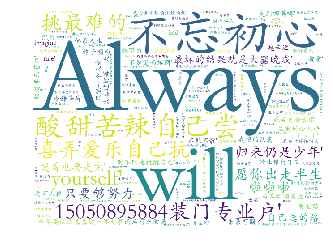

In [13]:
get_signature()

### 5.2 备注词云图

In [33]:
def remark():    
    signatures = []
    with open('friends.csv',mode='r',encoding='utf-8') as f:
        rows = csv.reader(f)
        for row in rows:
            signature = row[1]
            if signature != '':
                signatures.append(signature)
    split = jieba.cut(str(signatures), cut_all=False)
    words = ''.join(split)
    bg_image = plt.imread('bg.jpg')
    # 设置词云参数，参数分别表示：画布宽高、背景颜色、背景图形状、字体、屏蔽词、最大词的字体大小
    wc = WordCloud(width=1024, height=768, background_color='white', mask=bg_image, font_path='STKAITI.TTF',
                max_font_size=400, random_state=50)
    wc.generate_from_text(words)
    plt.imshow(wc)
    plt.axis('off')
    wc.to_file('remark.jpg')

In [28]:
# 涉及到隐私，so...
#remark()

---
# 6、朋友圈权限分析

In [26]:
from pyecharts import Bar

def relation(): 
    star_list = []
    deny_see_list = []
    no_see_list = []
    with open('friends.csv',mode='r',encoding='utf-8') as f:
        rows = csv.reader(f)
        for row in rows:
            name = row[1] if row[1]!='' else row[0]
            star = row[6]
            if star == '1':
                star_list.append(name)
            flag = row[7].replace('\n','')
            if flag in ['259','33027','65759']:
                deny_see_list.append(name)
            if flag in ['65539','65795']:
                no_see_list.append(name)
    print('星际好友：', star_list)
    print('不让看我的朋友圈： ',deny_see_list)
    print('不看她的朋友圈： ',no_see_list)
    attr = ['星际好友','不让看我的朋友圈','不看她的朋友圈']
    value = [len(star_list),len(deny_see_list),len(no_see_list)]
    bar = Bar('权限分析','',title_pos='center')
    bar.add('',attr,value,is_visualmap=True,os_label_show=True)
    bar.render('权限分析.html')

In [34]:
#relation()
#'''结果大概如下：'''
# 星际好友： [张三]
# 不让看我的朋友圈：  ['李四', '王五']
# 不看她的朋友圈：  []

* 结果如图：哪位没让看？
<img src="pic/8.png">

---
# 7、头像分析
---
### 7.1、 获取头像
* 获取所有好友的头像并保存到指定的文件夹下（这里为headImage）,每个图片的命名方式为：如果有备注则使用备注，否则使用Nickname。
* 注意：有时候可能在获取的过程中突然意外终止，可能是你的好友的好友备注或者Nickname中含有一些特殊的字符（后者可能性较大），这时候一个是增加字符处理的功能，另一种方式改个“正常”的备注。我在运行时意外中断，原因是 有个好友备注含有 | ，把它去掉就好了。

In [40]:
import itchat
import os
def get_image():
    itchat.auto_login()
    friends = itchat.get_friends(update=True)
    base_path = 'headImage'
    if not os.path.exists(base_path):
        os.mkdir(base_path)
    
    for friend in friends:
        img_data = itchat.get_head_img(userName=friend['UserName'])
        img_name = friend['RemarkName'] if friend['RemarkName'] != '' else friend['NickName']
        img_file = os.path.join(base_path,img_name + '.jpg')
        print(img_file)
        with open(img_file,'wb') as f:
            f.write(img_data)    

In [44]:
# get_image()  大家可以自己执行该指令，将会打印出已经获取到头像的所有名字

### 7.2、分析头像(更新18/11/9)
* 这里使用到了腾讯优图提供的人脸识别技术，对人脸进行检测和分析。具体请参阅[腾讯优图](https://open.youtu.qq.com/#/open/home)。感觉发现了新天地一样，哈哈
* 具体流程看这里：【[接入流程](https://open.youtu.qq.com/#/open/developer/join)】。
* 这里是优图【[Python_SDK](https://github.com/Tencent-YouTu/Python_sdk)】，有使用指导。
* 这里是【[人脸检测与分析](https://open.youtu.qq.com/#/open/developer/face-detect)】，可以看一下返回的数据结构，然后提取自己需要的.

In [9]:
import TencentYoutuyun

In [12]:
import itchat
from pyecharts import Pie
import os
import csv
from PIL import Image
import math

def analyse_headImg():
    '''向腾讯优图平台申请的开发密钥，此处需要替换为自己的密钥'''
    appid = '***'       # appid： 业务中的应用标识AppId
    secret_id = '**'   # secret_id：秘钥SecretId
    secret_key = '**'   # secret_key：秘钥SecretKey
    userid = '**'       # userid：用户id
    # end_point` 服务后台路径，默认是优图开放平台，支持腾讯云，人脸核身(核身服务需联系腾讯优图商务开通权限)
    end_point = TencentYoutuyun.conf.API_YOUTU_END_POINT
    youtu = TencentYoutuyun.YouTu(appid, secret_id, secret_key, userid, end_point)

    use_face = 0
    not_use_face = 0
    base_path = 'headImage'
    for file_name in os.listdir(base_path):
        img_path = os.path.join(base_path,file_name)
        result = youtu.DetectFace(img_path)
        # print(result)
        if result['errorcode'] == 0:
            use_face += 1
            gender = '男' if result['face'][0]['gender'] > 50 else '女'
            age = result['face'][0]['age']
            beauty = result['face'][0]['beauty']
            glasses = '不带眼镜' if result['face'][0]['glass']==0 else '带眼镜'
            with open('header.txt',mode='a',encoding='utf-8') as f:
                f.write('%s,%s,%d,%d,%s\n' % (file_name[:-4], gender, age, beauty, glasses))
        else:
            not_use_face += 1
    attr = ['使用人脸','未使用人脸']
    value = [use_face, not_use_face]
    pie = Pie('好友头像分析', '', title_pos='center')
    pie.add('',attr,value,radius=[30,75],is_label_show=True,is_legend_show=True,legend_top='bottom')
    pie.render('好友头像分析.html')

In [11]:
analyse_headImg()

* 第7部分涉及到TencentYoutuyun，所以这部分最好在Pycharm上编写运行
* 一开始没注意，注册审核竟然需要2天，好吧等等再把最终的结果补充。这里先放个没有真正经过处理的。
---
#### 更新啦：实际上注册审核也没有两天，第二天早上就收到审核通过的邮件，赶紧改一下代码，但实际却返回401错误，去【[API错误码](https://open.youtu.qq.com/#/open/developer/error-code)】看了一下，是权限验证失败。但是自己是直接复制过来的呀！不会有问题，难道是uerid有错误？后来了解了不是这个原因（这里使用自己注册的qq号就可以）。在检查一下代码吧，咦，secret_id这里好像貌似大概多了个空格，试一下吧。果然，问题就出在这个空格上了！沉痛的教训，因为不仔细，浪费了大半天时间！
---
* <img src="pic/10.png">
* 保存的数据：
<img src="pic/11.jpg">

### 7.3、头像大合照（最后一章节啦！）

In [2]:
import os
import math
from PIL import Image
def join_image():
    base_path = 'headImage'
    files = os.listdir(base_path)
    image = Image.new('RGB', (640, 640)) #创建一个640*640的图片
    each_size = int(math.sqrt(float(640*640)/len(files)))#计算每个图片的大小
    lines = int(640/each_size)
    x = 0
    y = 0
    for file_name in files:
        img = Image.open(os.path.join(base_path,file_name))
        img = img.resize((each_size,each_size),Image.ANTIALIAS)
        image.paste(img,(x*each_size,y*each_size))
        x += 1
        if x ==lines:
            x=0
            y += 1
    image.save('all.jpg')
    # itchat.send_image('all.jpg','filehelper')

In [3]:
join_image()

* 好了，看看结果吧！粗略的看了一下，应该是没有把所有的头像都下载了，有个人的另一半就没有，哈哈，应该是不想虐狗吧
<img src='all.jpg'>

# 至此整个项目，历时两天结束！
* 剩下的就反复消化吧！